In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Business Insights

In [2]:
df = pd.read_excel("OMIS 4000 Final Project Data(1).xlsx")

In [3]:
def isolate_cols(comparison_col, physician_col=" Physician ID"):
    """Filters two columns to isolate a metric based on a physician. 
    (e.g., isolating the average patient age for each physician from all days). 

    Parameters
    ----------
    comparison_col: str 
        Column label of the comparison metric.

    physician_col: str
        Column label of the physician id

    Returns
    -------
    comparison_data: dict
        Isolated comparison data in the format: {physician_id: [comparison metric...]}
    
    """
    
    comparison_data = {}
    # Isolating all of a physicians patient's ESIs. 
    for i in range(len(df)):
        row = df.iloc[i]
        physician = row[physician_col]
        comparison_metric = row[comparison_col]
        if physician not in comparison_data:
            comparison_data[physician] = [comparison_metric]
        if physician in comparison_data:
            comparison_data[physician].append(comparison_metric)
    return comparison_data

def average_comparison(comparison_data):
    """Computes the averages of the comparison metric such that it can be plotted.

    Parameters
    ----------
    comparison_data : dict
        Data of the comparison metric.

    Returns
    -------
    physician_ids: list
    metric_averages: list
        Mean of of the comparison metric.

    """

    physician_ids = df[" Physician ID"].unique()
    metric_averages = [] # Average patient ESI for nth physician
    for physician_id in physician_ids:
        try:
            metric_average = sum(comparison_data[physician_id]) / len(comparison_data[physician_id])
            metric_averages.append(metric_average)
        except KeyError:
            print(f"Physician {physician_id} not found.")
    total_comparison_mean = sum(metric_averages) / len(metric_averages)
    return physician_ids, metric_averages 


### ESI
Comparing the average ESI of patients for each physician across all days.

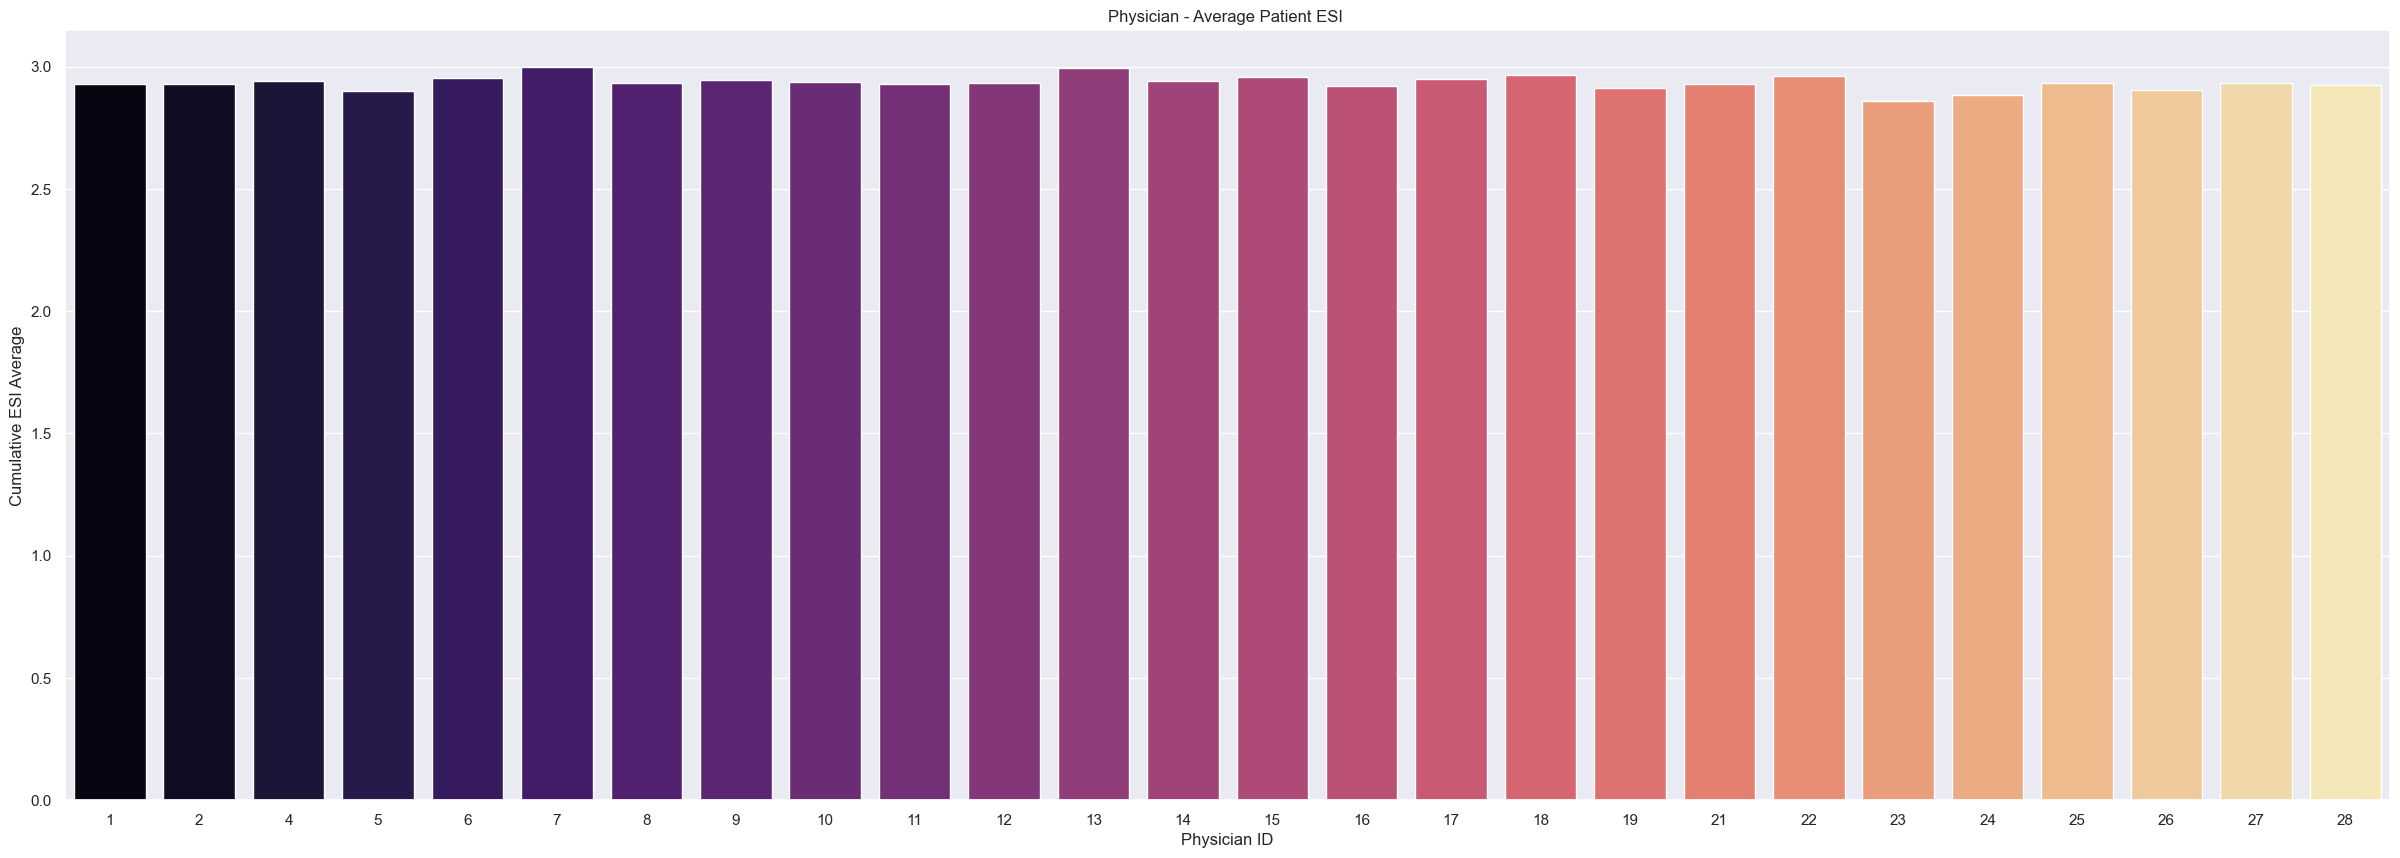

In [4]:
esi_data = isolate_cols("Average Patient ESI")
physician_ids, esi_averages = average_comparison(esi_data)

plt.figure(figsize=(30,10))
sns.barplot(x=physician_ids, y=esi_averages, palette="magma")
plt.title("Physician - Average Patient ESI ")
plt.xlabel("Physician ID")
plt.ylabel("Cumulative ESI Average")
plt.show()


### Age Comparison Among Physicians 

Comparing the average patient age of each physician across all days.

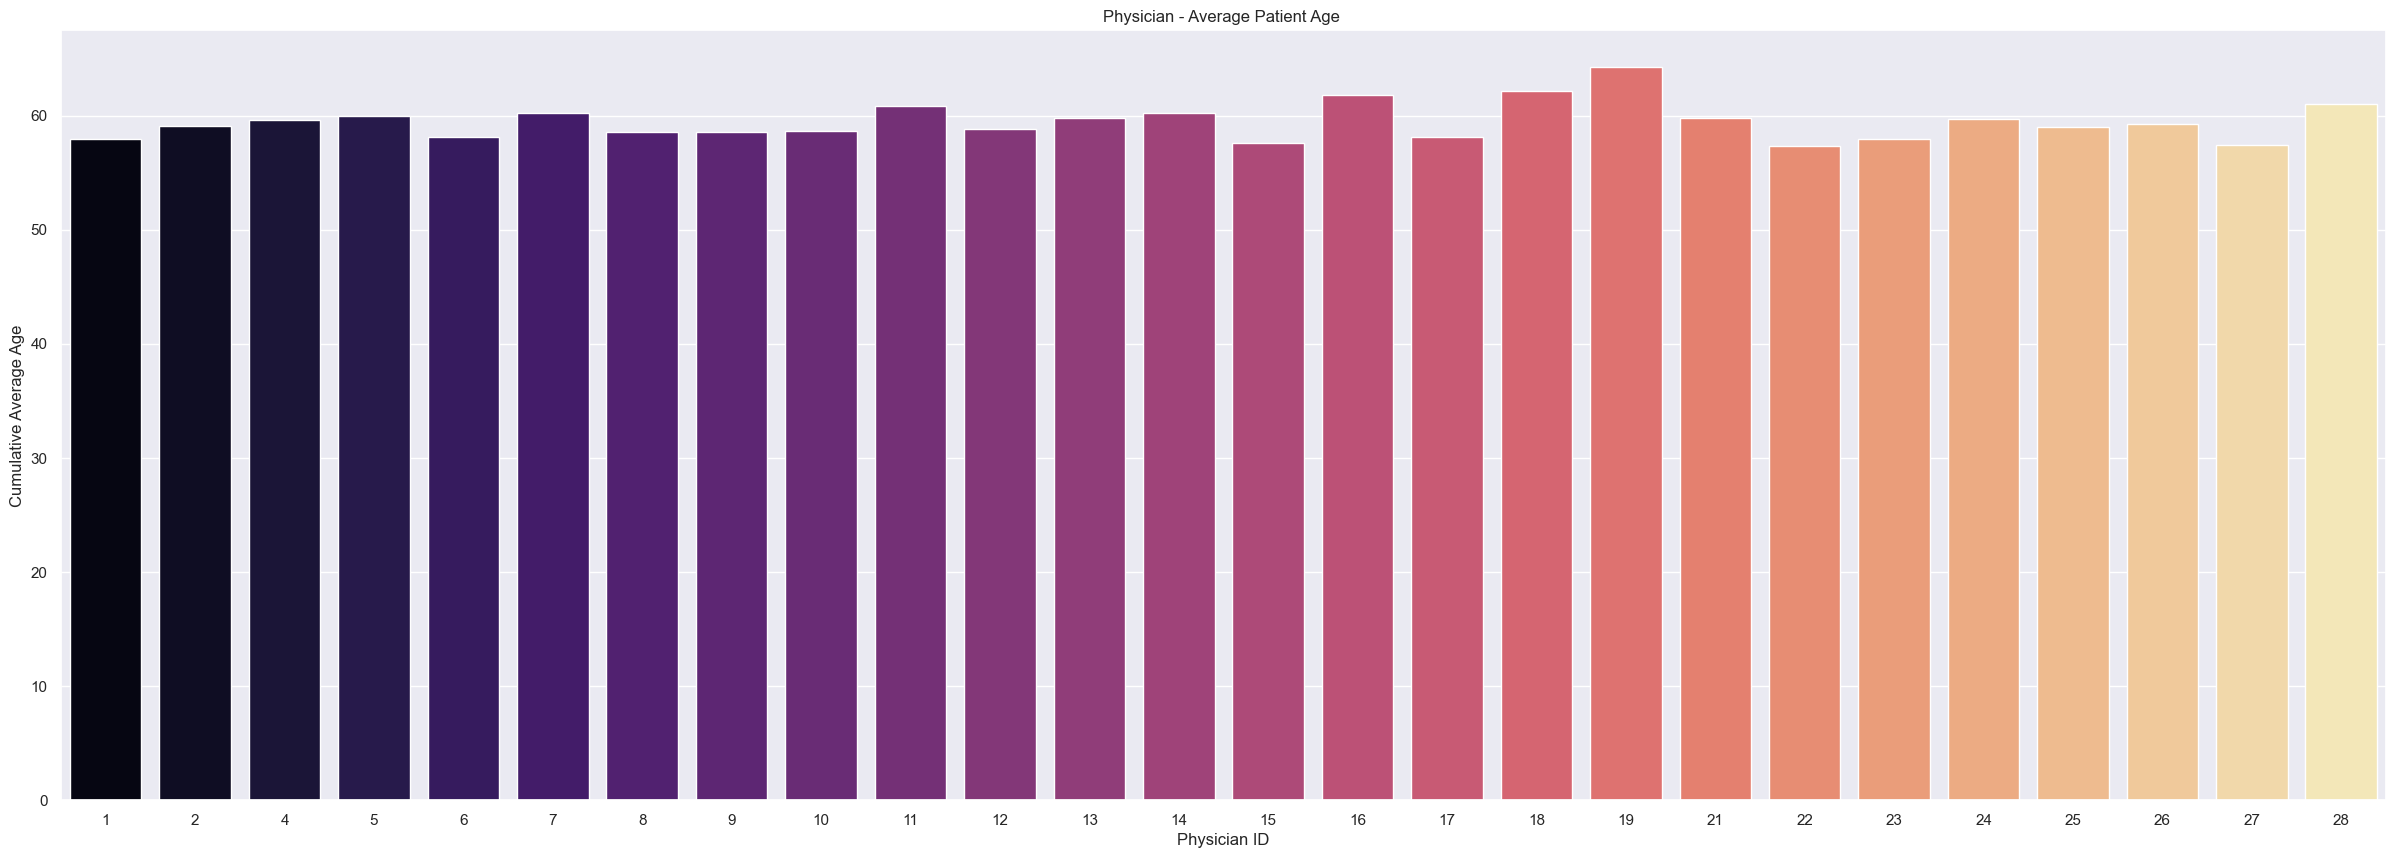

In [5]:
age_data = isolate_cols("Average Patient Age")
physician_ids, age_averages = average_comparison(age_data)

plt.figure(figsize=(30,10))
sns.barplot(x=physician_ids, y=age_averages, palette="magma")
plt.title("Physician - Average Patient Age ")
plt.xlabel("Physician ID")
plt.ylabel("Cumulative Average Age")
plt.show()

### Patient Gender Comparison Among Physicians 

Comparing the percent of female patients of each physician across all days.

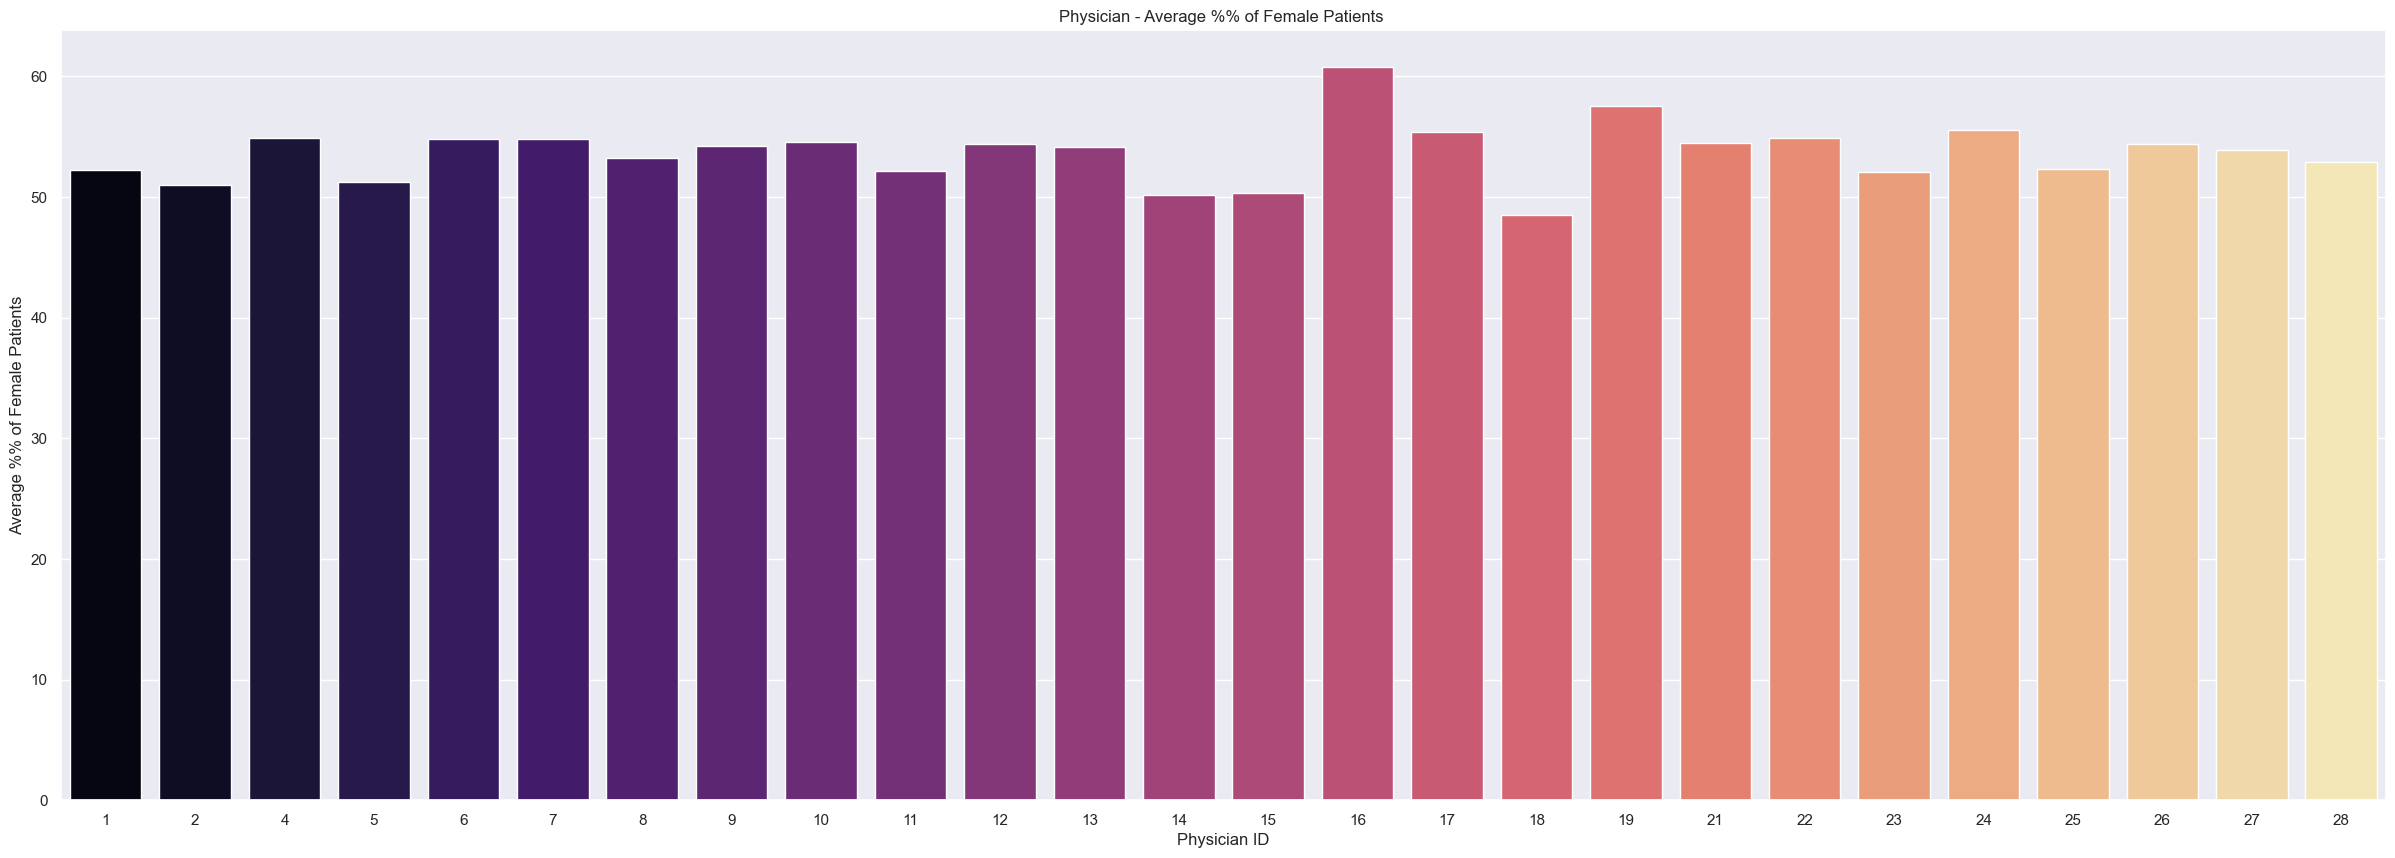

In [6]:
gender_data = isolate_cols("Female Patients (%)")
physician_ids, gender_averages = average_comparison(gender_data)

plt.figure(figsize=(30,10))
sns.barplot(x=physician_ids, y=gender_averages, palette="magma")
plt.title("Physician - Average %% of Female Patients ")
plt.xlabel("Physician ID")
plt.ylabel("Average %% of Female Patients")
plt.show()

### Average Lab Order Count Among Physicians 

Comparing the average lab order count of each physician across all days.

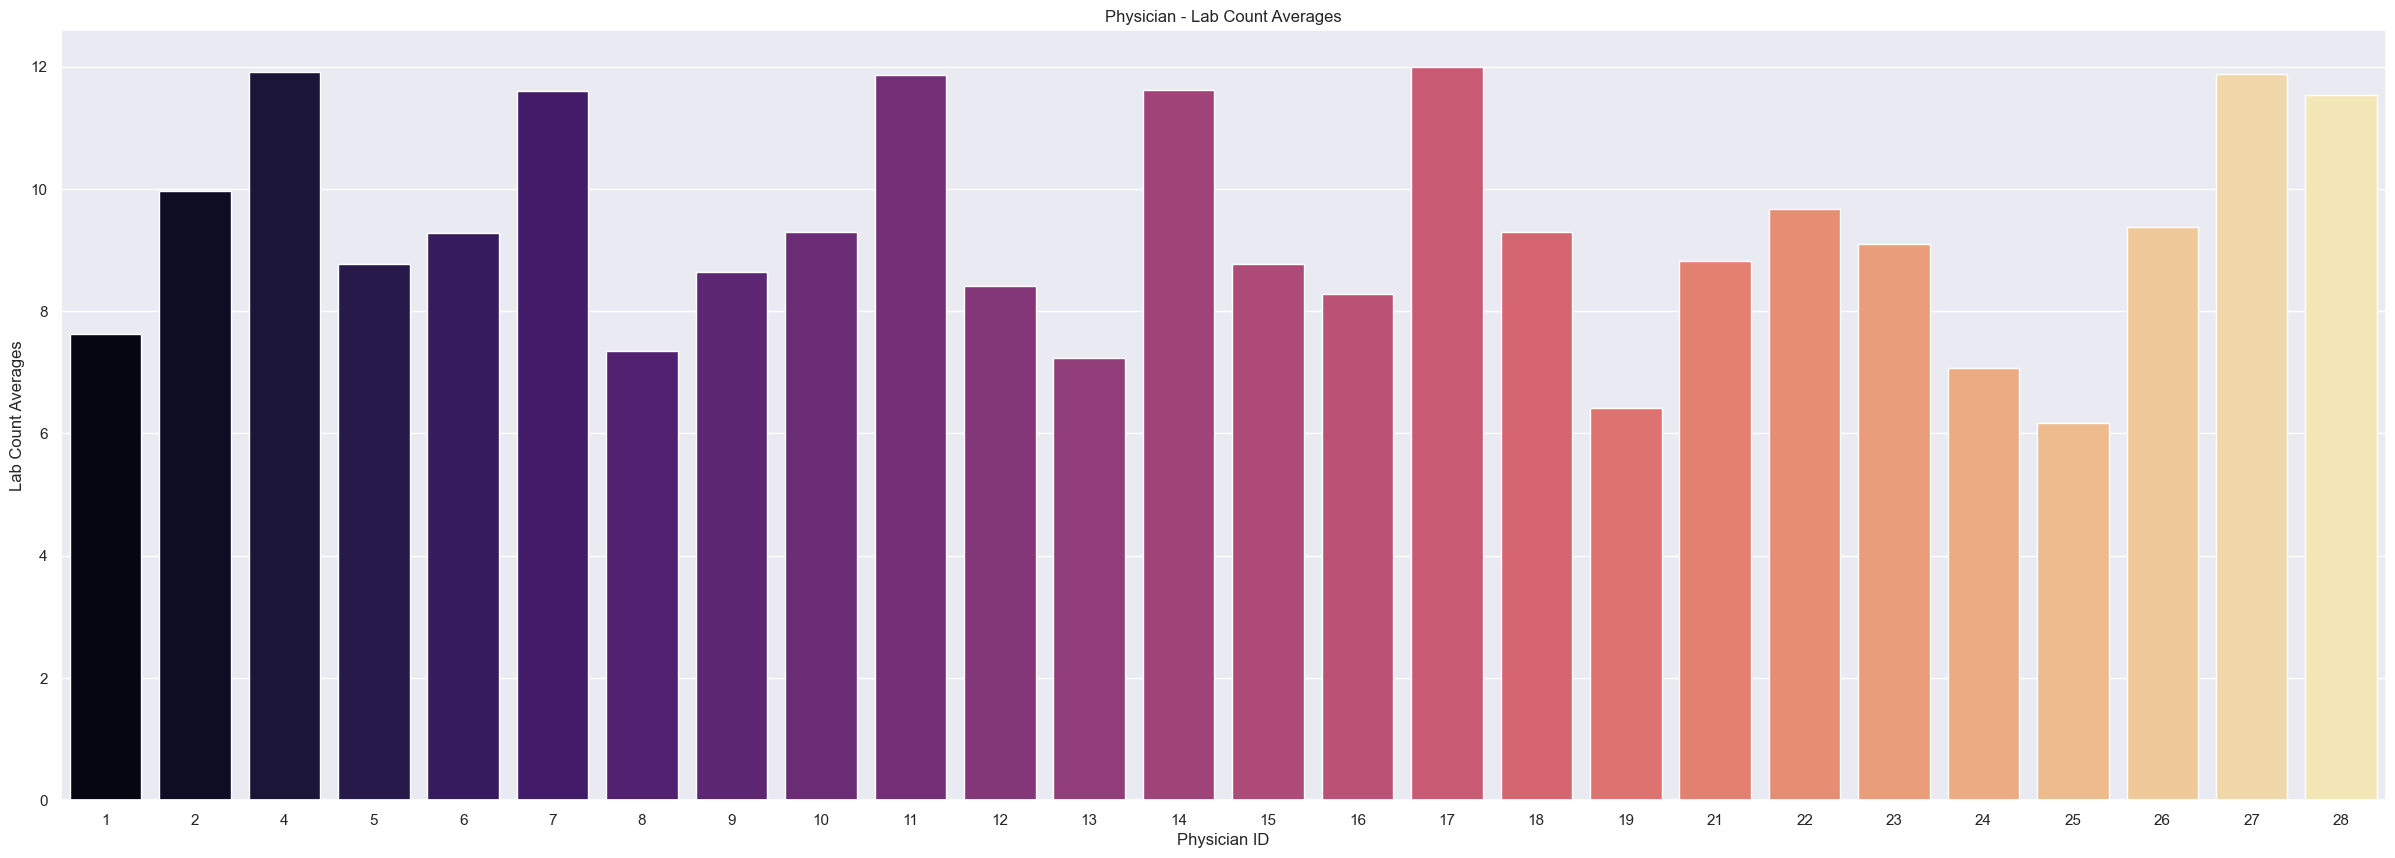

In [7]:
lab_count_data = isolate_cols("Average Lab Order Count")
physician_ids, lab_count_averages = average_comparison(lab_count_data)

plt.figure(figsize=(30,10))
sns.barplot(x=physician_ids, y=lab_count_averages, palette="magma")
plt.title("Physician - Lab Count Averages")
plt.xlabel("Physician ID")
plt.ylabel("Lab Count Averages")
plt.show()


### Average Radiology Order Count Among Physicians 

Comparing the Radiology lab order count of each physician across all days.

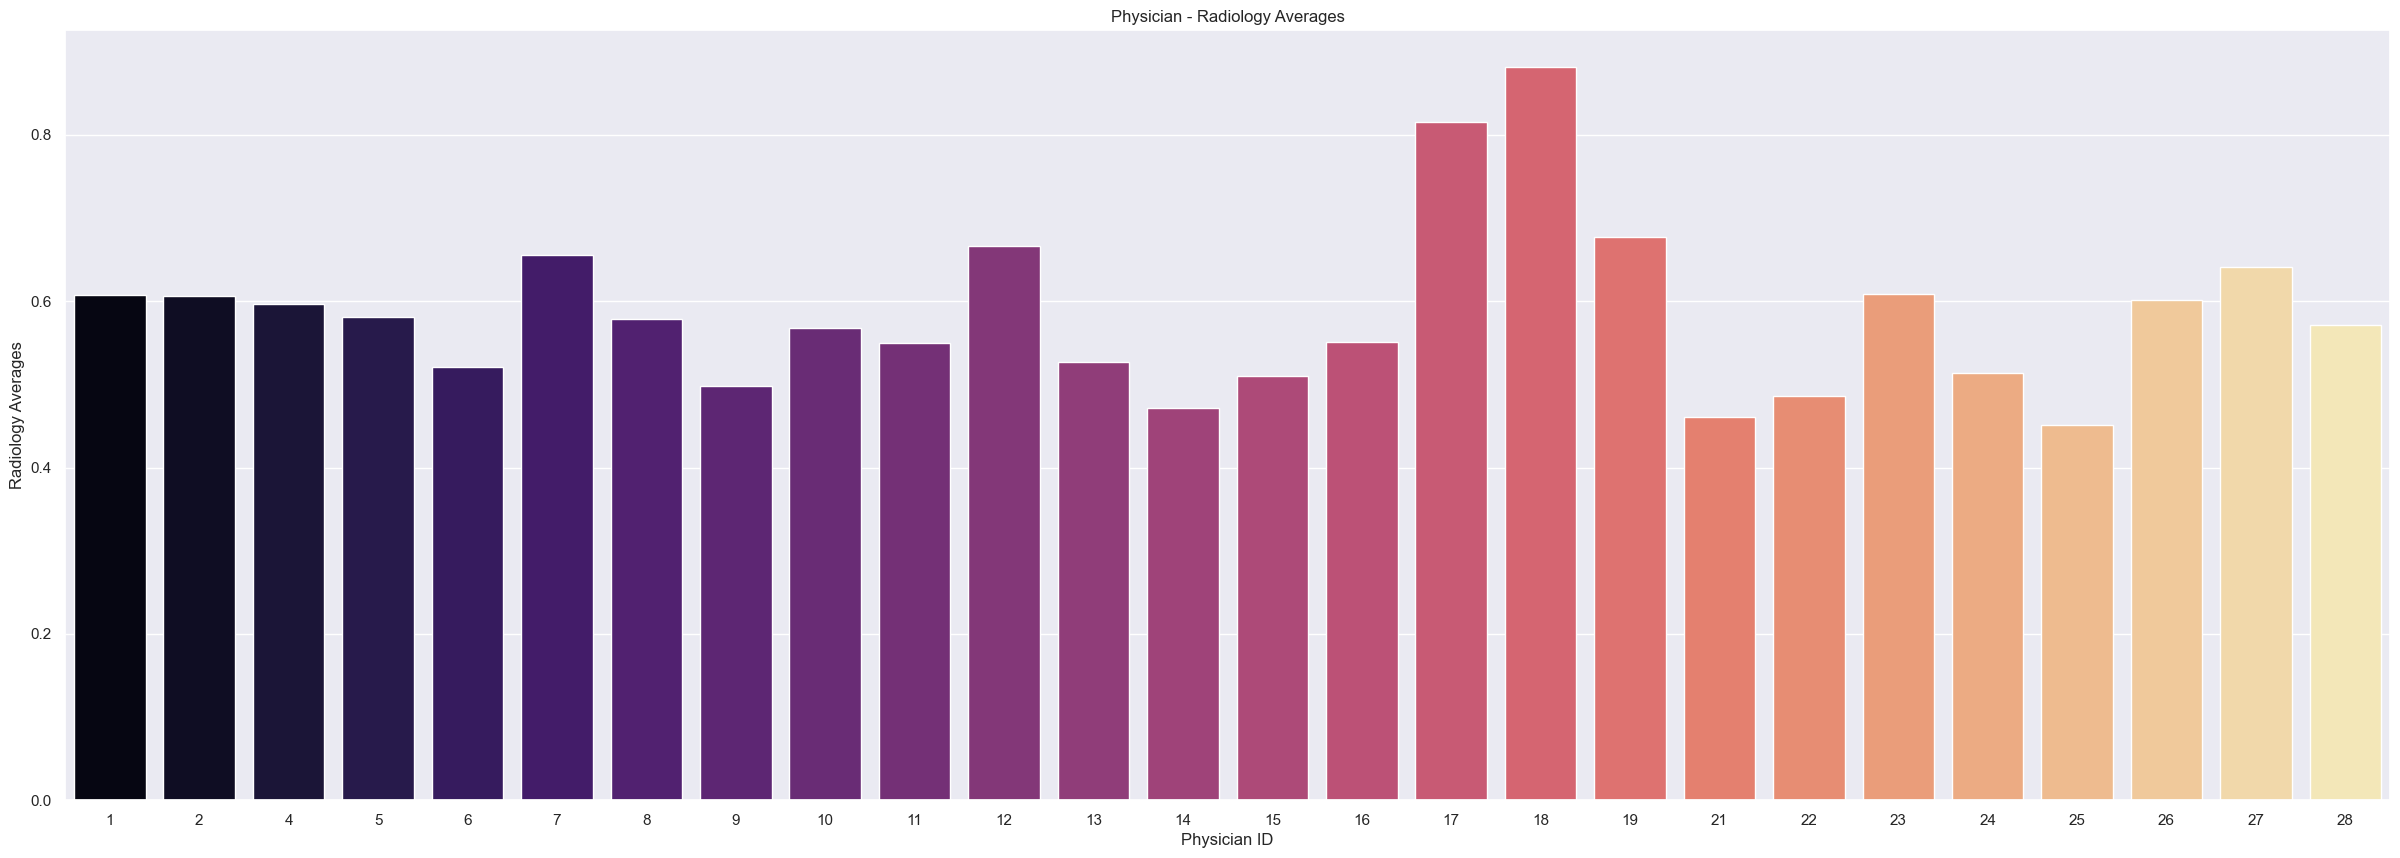

In [8]:
radiology_data = isolate_cols("Average Radiology Order Count")
physician_ids, radiology_averages = average_comparison(radiology_data)

plt.figure(figsize=(30,10))
sns.barplot(x=physician_ids, y=radiology_averages, palette="magma")
plt.title("Physician - Radiology Averages")
plt.xlabel("Physician ID")
plt.ylabel("Radiology Averages")
plt.show()


### Average CT Order Count Among Physicians 

Comparing the average CT order count of each physician across all days.

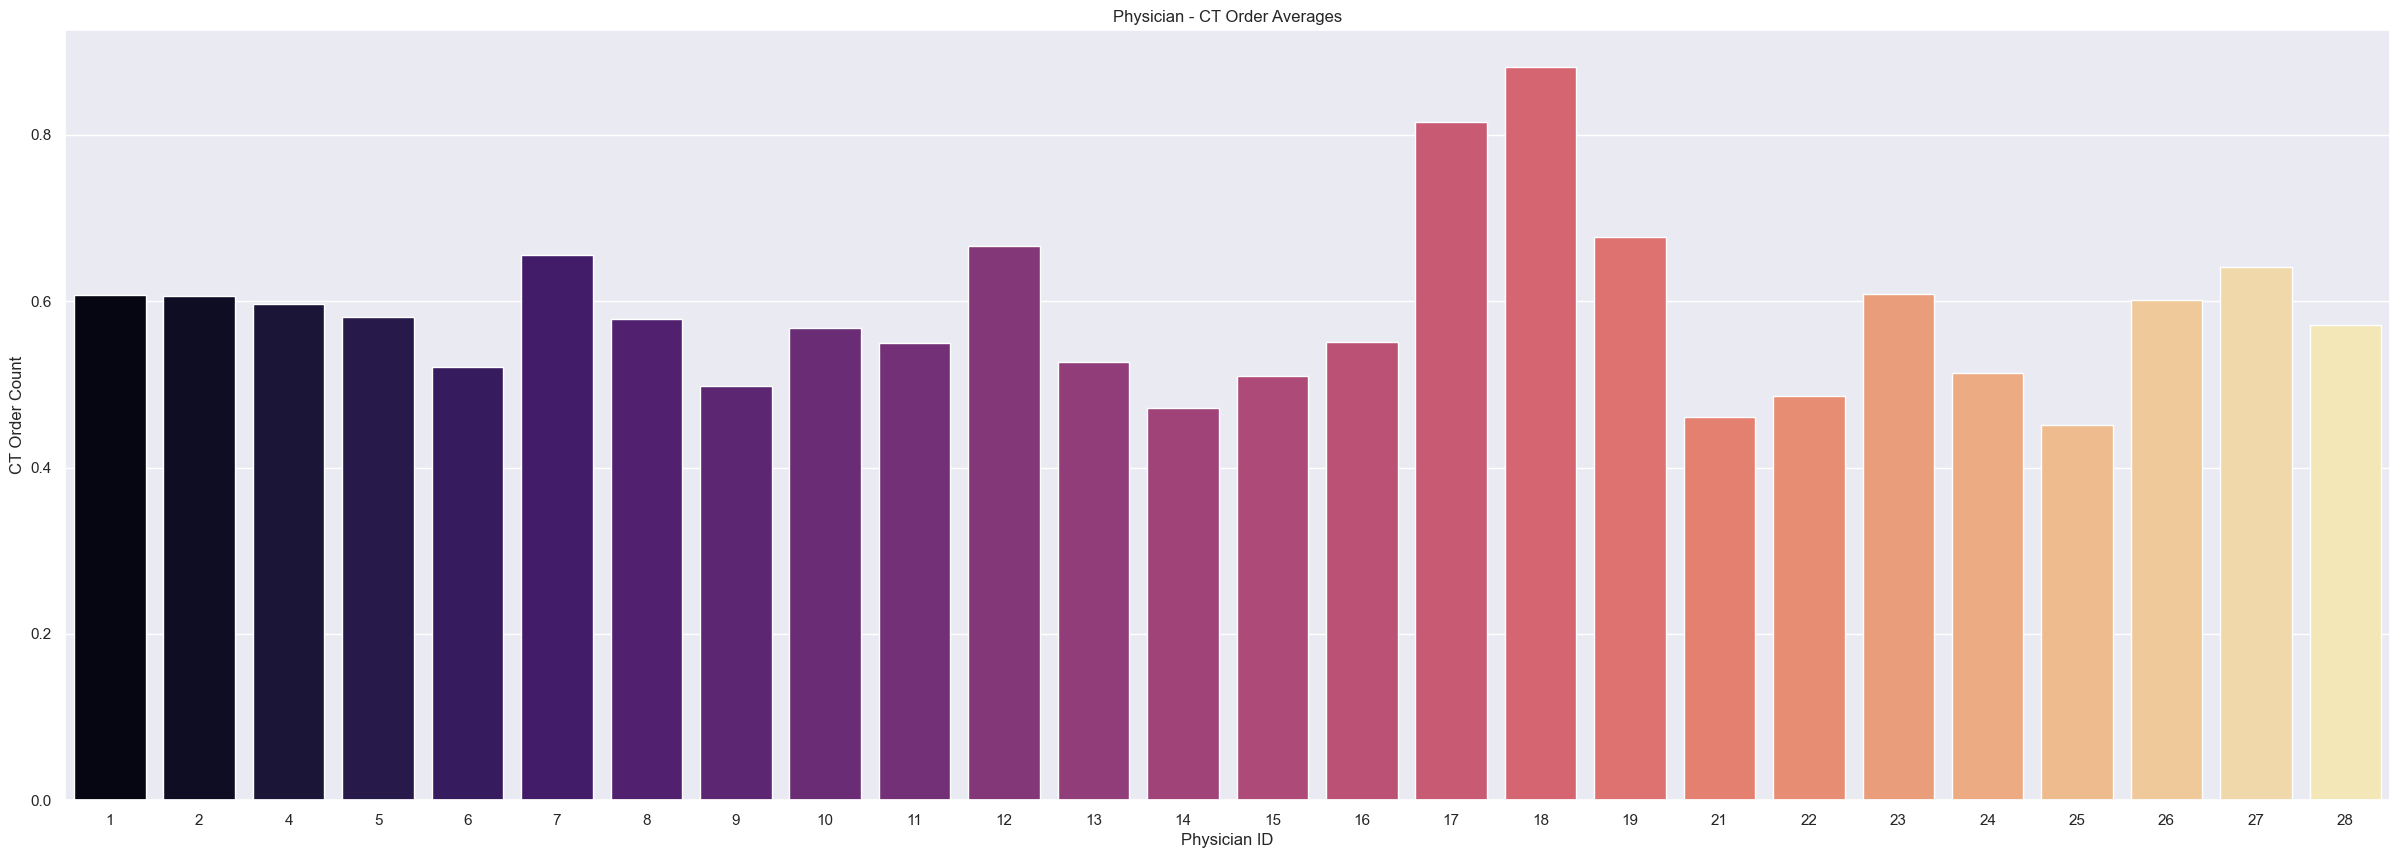

In [9]:
ct_order_data = isolate_cols("Average Radiology Order Count")
physician_ids, ct_order_averages = average_comparison(ct_order_data)

plt.figure(figsize=(30,10))
sns.barplot(x=physician_ids, y=ct_order_averages, palette="magma")
plt.title("Physician - CT Order Averages")
plt.xlabel("Physician ID")
plt.ylabel("CT Order Count")
plt.show()


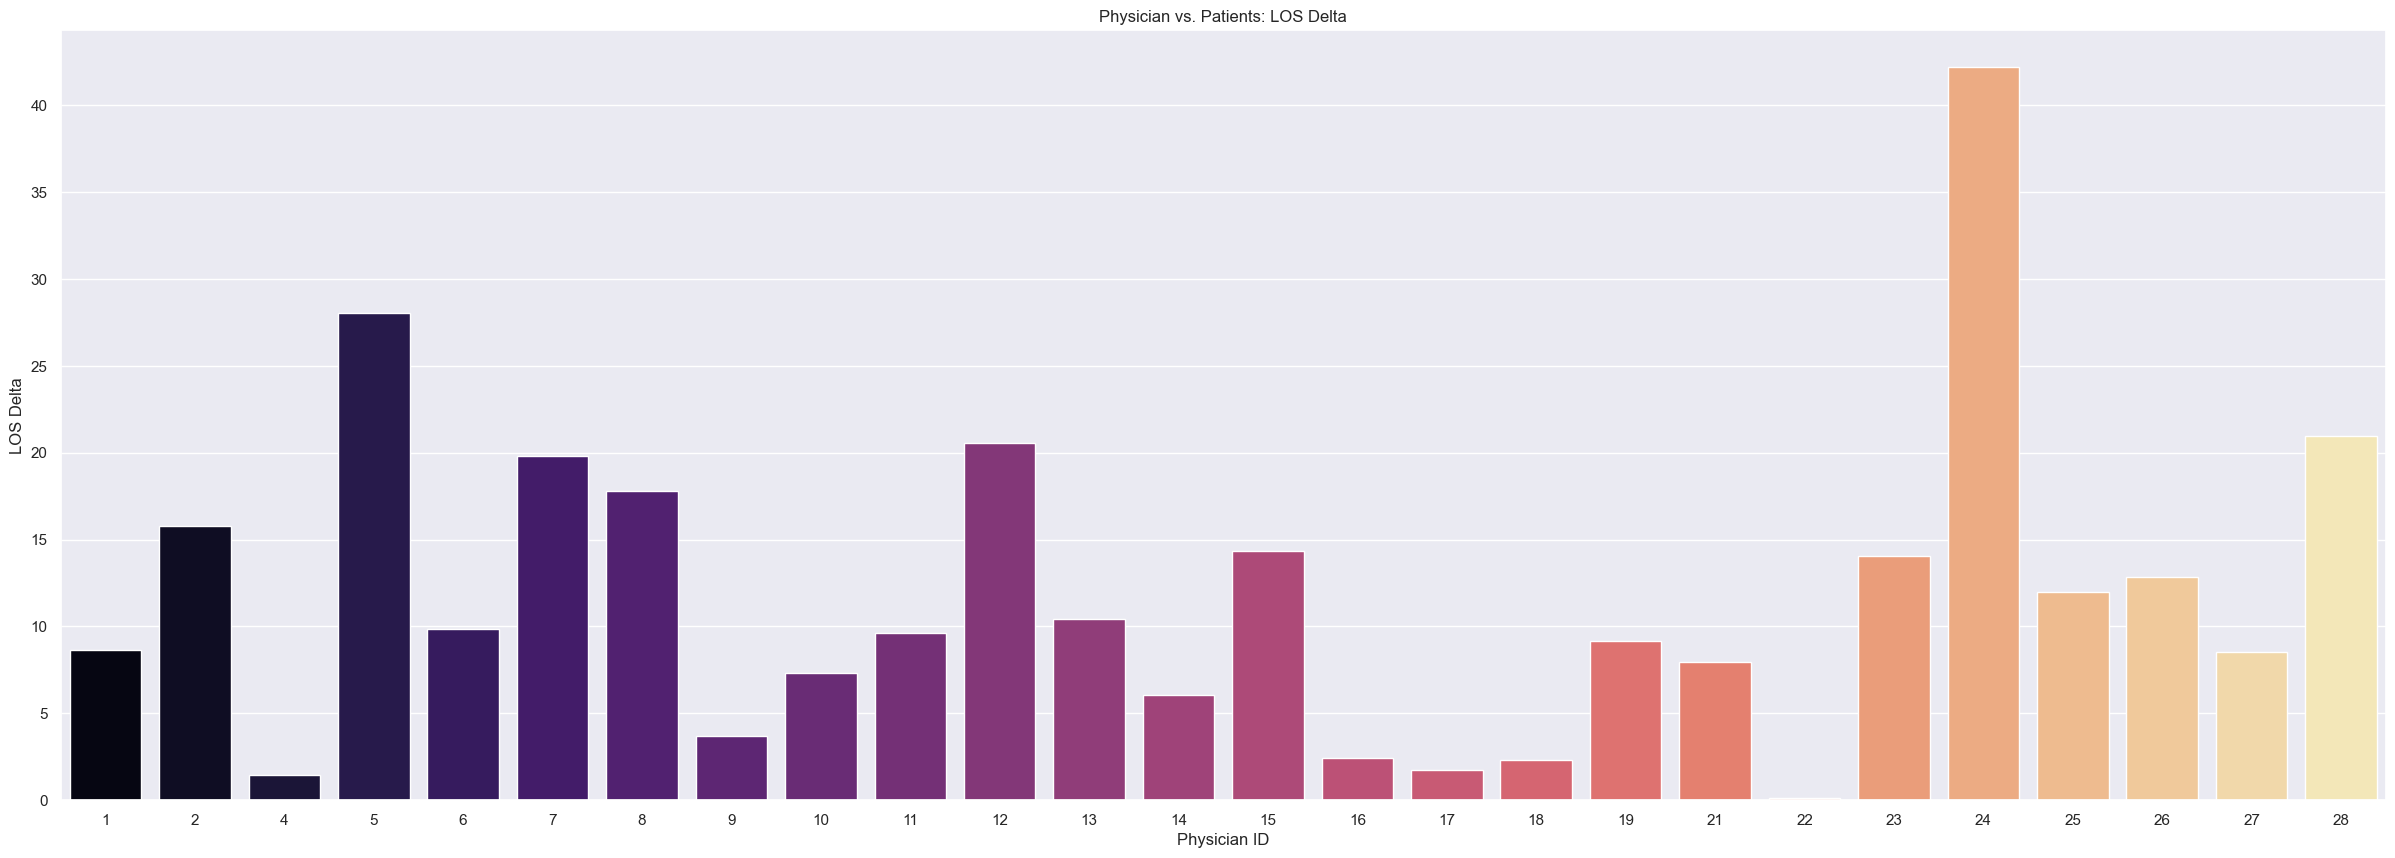

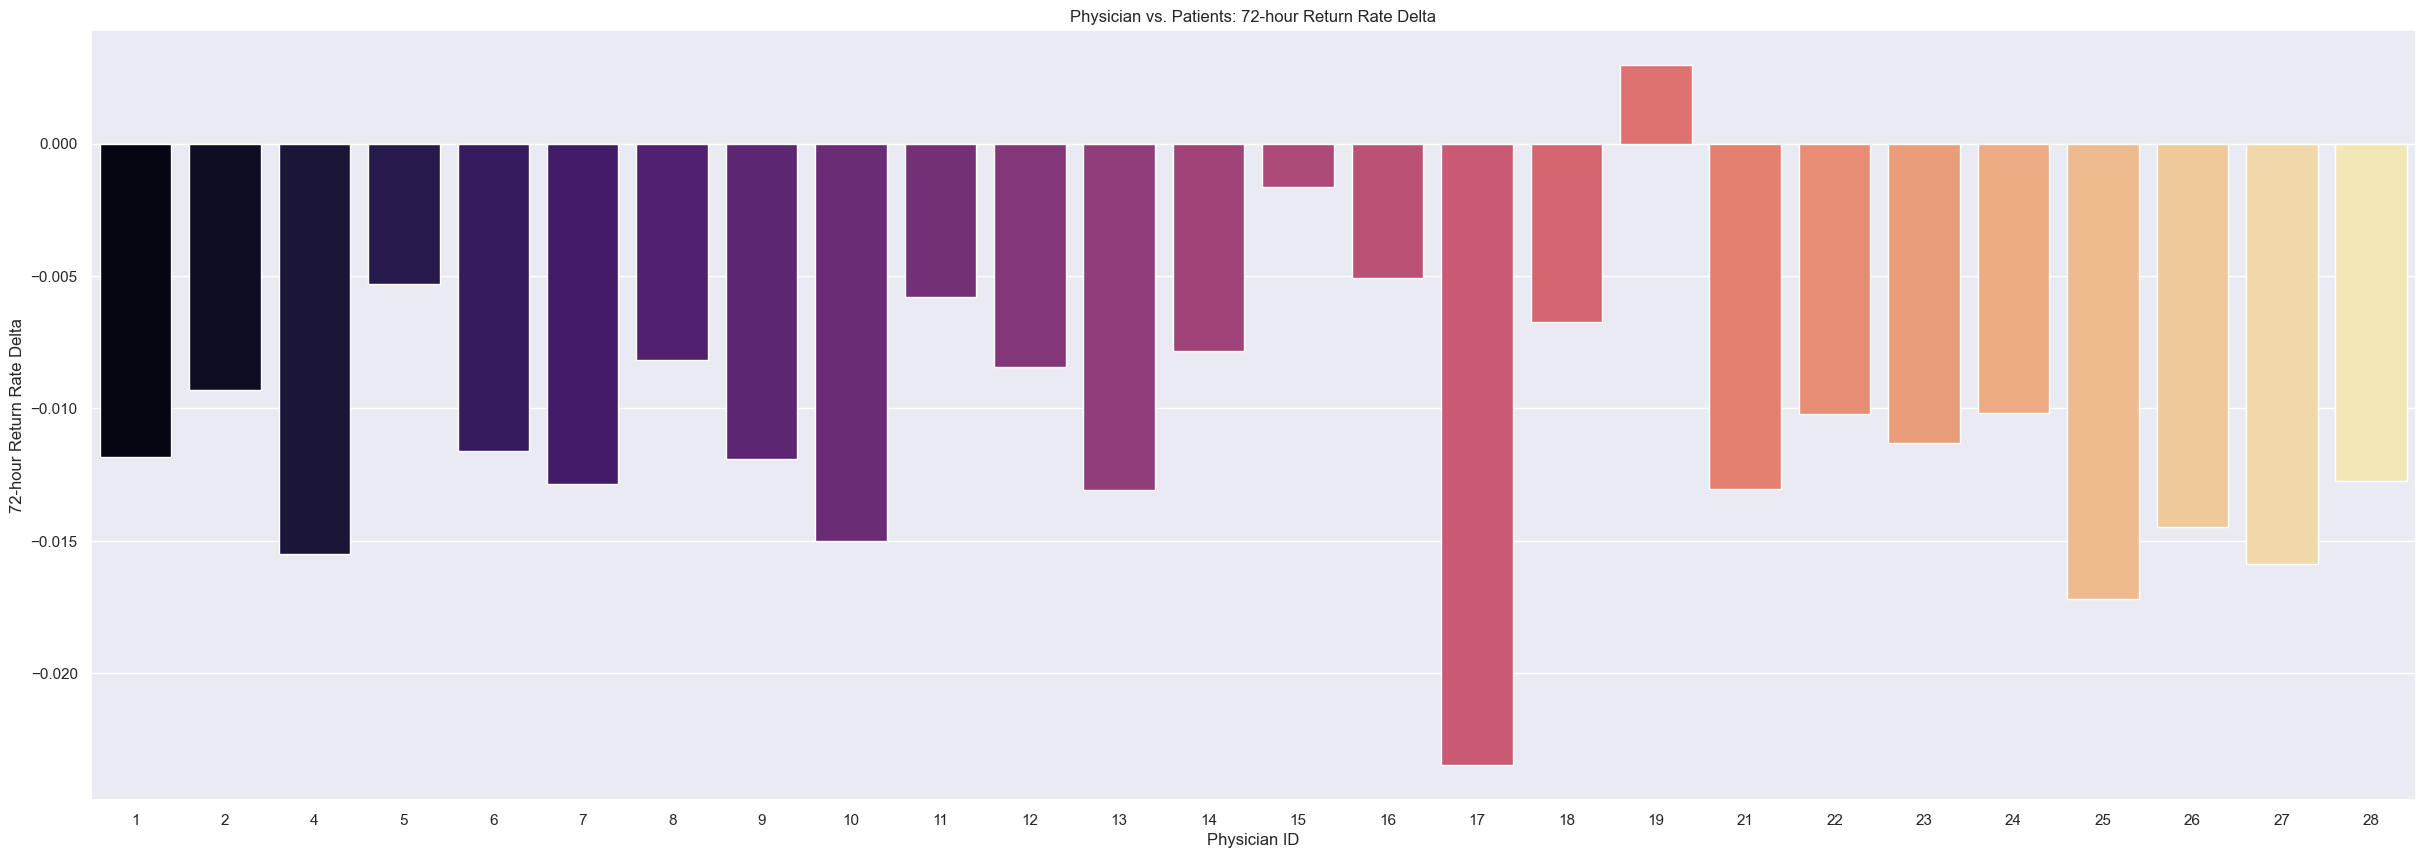

In [10]:

# Fetching average patient, physician, LOS and 72-hour return time respectively.
physician_ids, patient_los_avg = average_comparison(isolate_cols("Average Patient LOS (minutes)"))
physician_ids, physician_los_avg = average_comparison(isolate_cols("Physician Speed (LOS in minutes)"))

physician_ids, patient_returns_avg = average_comparison(isolate_cols("72-hr Rate of Return"))
physician_ids, physician_returns_avg = average_comparison(isolate_cols("Physician Quality (72-hour return rate)"))


los_deltas = []
return_deltas = []

num_physicians = physician_ids = df[" Physician ID"].unique()


# Calculating deltas between each average (patient - physician)
for i in range(len(patient_los_avg)):
    delta_los = abs(patient_los_avg [i] - physician_los_avg[i])
    delta_returns = patient_returns_avg [i] - physician_returns_avg[i]
    los_deltas.append(delta_los)
    return_deltas.append(delta_returns)


# Plotting bar graphs for each delta.
plt.figure(figsize=(30,10))
sns.barplot(x=physician_ids, y=los_deltas, palette="magma")
plt.title("Physician vs. Patients: LOS Delta")
plt.xlabel("Physician ID")
plt.ylabel("LOS Delta")
plt.show()

plt.figure(figsize=(30,10))
sns.barplot(x=physician_ids, y=return_deltas, palette="magma")
plt.title("Physician vs. Patients: 72-hour Return Rate Delta")
plt.xlabel("Physician ID")
plt.ylabel("72-hour Return Rate Delta")
plt.show()
